## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df_shopsy = pd.read_csv("shopsy_all_products.csv")

In [3]:
df_shopsy

,Product Name,Category,Price,Rating,No_of_Reviews
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,₹587,3.8,692
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,₹524,3.8,57
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,₹465,3.9,27
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,₹629,4.0,157
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,₹550,3.9,381
...,...,...,...,...,...
996,NAVYA Dustproof LED/LCD Cover for All Models L...,Computer Accessories,₹75,3.9,134
997,Agrima COMPACT USB HUB A-55 USB Hub,Computer Accessories,₹133,3.8,954
998,NAVYA Dustproof LED/LCD Cover for All Models L...,Computer Accessories,₹146,3.9,252
999,Agrima PREMIUM AGRiMA USB HUB A-99 USB Hub,Computer Accessories,₹95,3.8,7


## Basic Data Understanding

In [4]:
df_shopsy.shape

(1001, 5)

In [5]:
df_shopsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   1001 non-null   object 
 1   Category       1001 non-null   object 
 2   Price          1001 non-null   object 
 3   Rating         1001 non-null   float64
 4   No_of_Reviews  1001 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [6]:
df_shopsy.describe()

,Rating,No_of_Reviews
count,1001.000000,1001.000000
mean,3.926074,205.029970
std,0.288703,240.698257
min,3.200000,2.000000
25%,3.700000,27.000000
50%,3.900000,104.000000
75%,4.100000,296.000000
max,5.000000,996.000000


In [7]:
df_shopsy.columns

Index(['Product Name', 'Category', 'Price', 'Rating', 'No_of_Reviews'], dtype='object')

In [8]:
df_shopsy['Category'].value_counts().to_frame(name = 'count').reset_index()

,Category,count
0,Beauty,104
1,Computer Accessories,74
2,Health & Fitness,73
3,Mobile Accessories,71
4,Stationary,69
5,Women's Clothing,64
6,Kitchen Appliances,62
7,Home Decor,58
8,Toys,58
9,Men's Clothing,55


In [9]:
df_shopsy.dtypes.to_frame()

,0
Product Name,object
Category,object
Price,object
Rating,float64
No_of_Reviews,int64


## Data Cleaning

#### Changing Data Type


In [10]:
df_shopsy['Price'] = (
    df_shopsy['Price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)

df_shopsy['Price'] = pd.to_numeric(df_shopsy['Price'], errors='coerce')

In [11]:
df_shopsy.dtypes

Product Name      object
Category          object
Price              int64
Rating           float64
No_of_Reviews      int64
dtype: object

In [12]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,692
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,524,3.8,57
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,465,3.9,27
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,629,4.0,157
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,550,3.9,381


In [13]:
df_shopsy.isnull().sum().to_frame(name = "Null Count")

,Null Count
Product Name,0
Category,0
Price,0
Rating,0
No_of_Reviews,0


#### Checking Duplicate Values

In [14]:
df_shopsy.duplicated().sum()

np.int64(0)

##### Text Casing

In [15]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,692
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,524,3.8,57
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,465,3.9,27
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,629,4.0,157
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,550,3.9,381


# Exploratory Data Analysis(EDA)

# Price Distribution (Histogram / KDE)

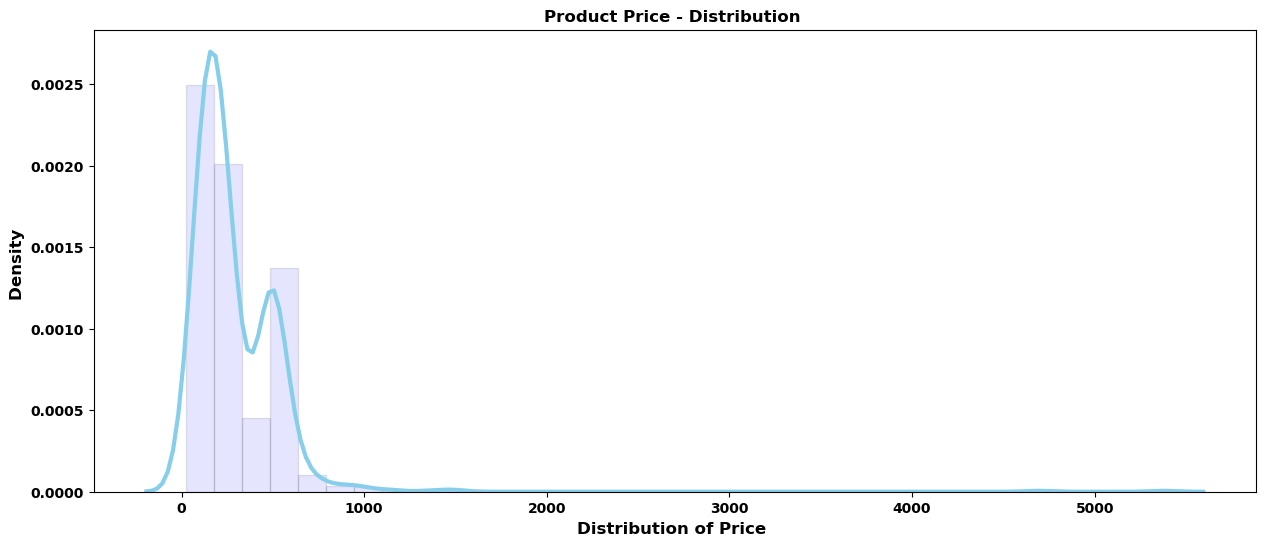

In [16]:
plt.figure(figsize = (15,6))
plt.hist(df_shopsy['Price'],density = True,bins = 35,alpha = 0.1,color = 'blue',edgecolor = 'black')

sns.kdeplot(df_shopsy['Price'],color = 'skyblue',lw = 3)   #density plot

plt.xlabel('Distribution of Price ',fontsize = 12,fontweight = 'bold')
plt.ylabel('Density ',fontsize = 12,fontweight = 'bold')
plt.title('Product Price - Distribution ',fontsize = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold',color='black')
plt.yticks(fontweight = 'bold',color='black')

plt.show()

##### Insights

•Price distribution is right-skewed.
•Majority of products fall in the low to mid-price range.
•Few high-price outliers exist.

## Price Outliers Analysis

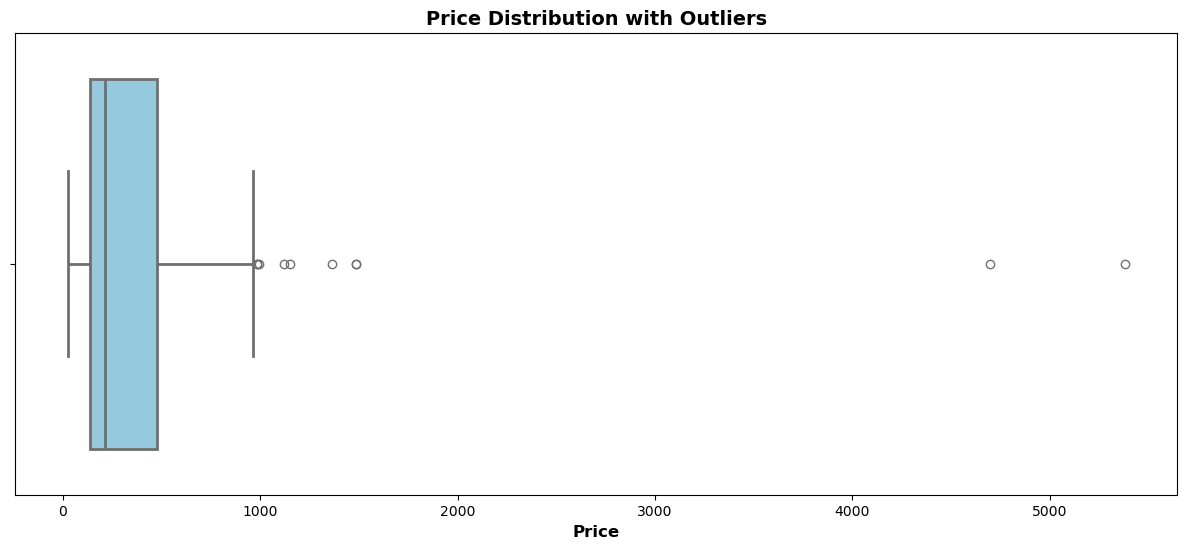

In [17]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    x=df_shopsy['Price'],
    color='skyblue',          
    linewidth=2,
    fliersize=6            
)

plt.title("Price Distribution with Outliers", fontsize=14, fontweight = 'bold')
plt.xlabel("Price", fontsize=12, fontweight = 'bold')

plt.show()

#### Insights

•Significant outliers exist above the upper whisker.
•These may represent premium or luxury products.
•Outliers increase variance and affect average price calculations.

## Average Price by Category

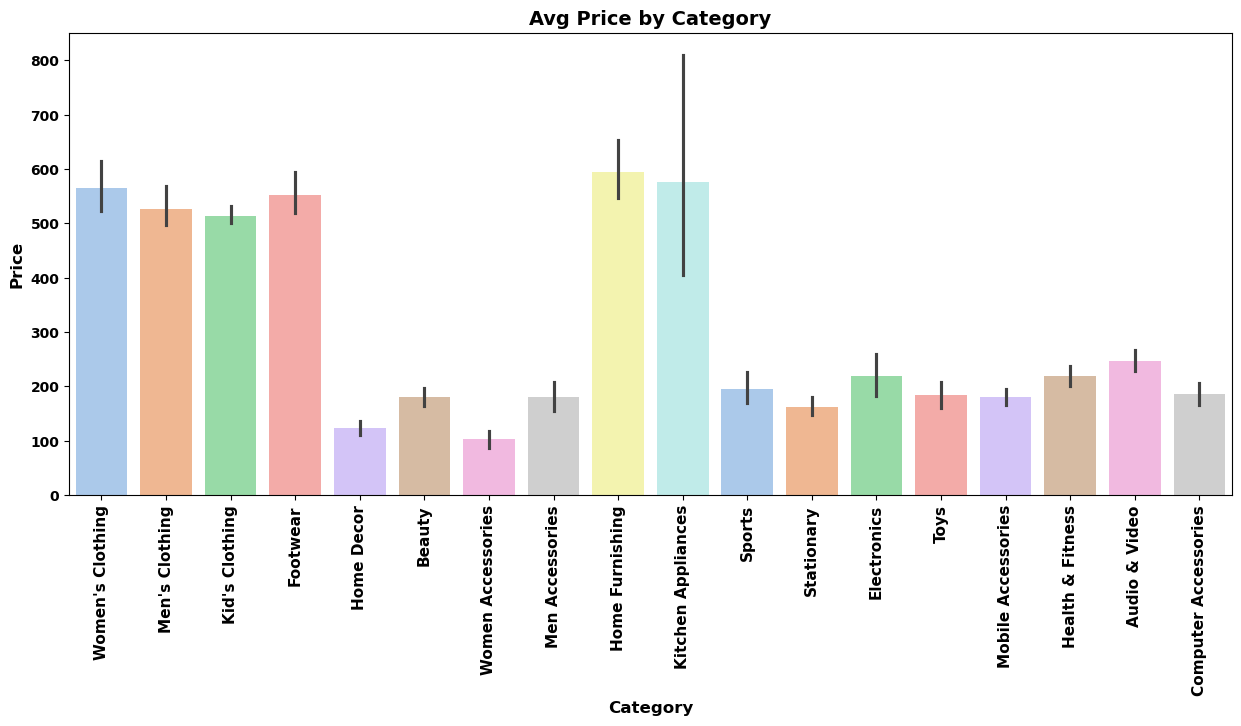

In [18]:
plt.figure(figsize=(15,6))

sns.barplot(
    data=df_shopsy,
    x='Category',
    y='Price',
    palette = 'pastel'
)

plt.title('Avg Price by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')

plt.xticks(rotation=90, fontsize=11, fontweight='bold', color='black')
plt.yticks(fontweight='bold', color='black')
plt.show()

#### Insights

•Categories like kitchen appliances, home furnishing, and clothing have higher average prices.
•Accessories, stationery, and beauty categories are relatively low-priced.
•Large price variation exists within certain categories.

# Total Reviews by Category with Average Rating

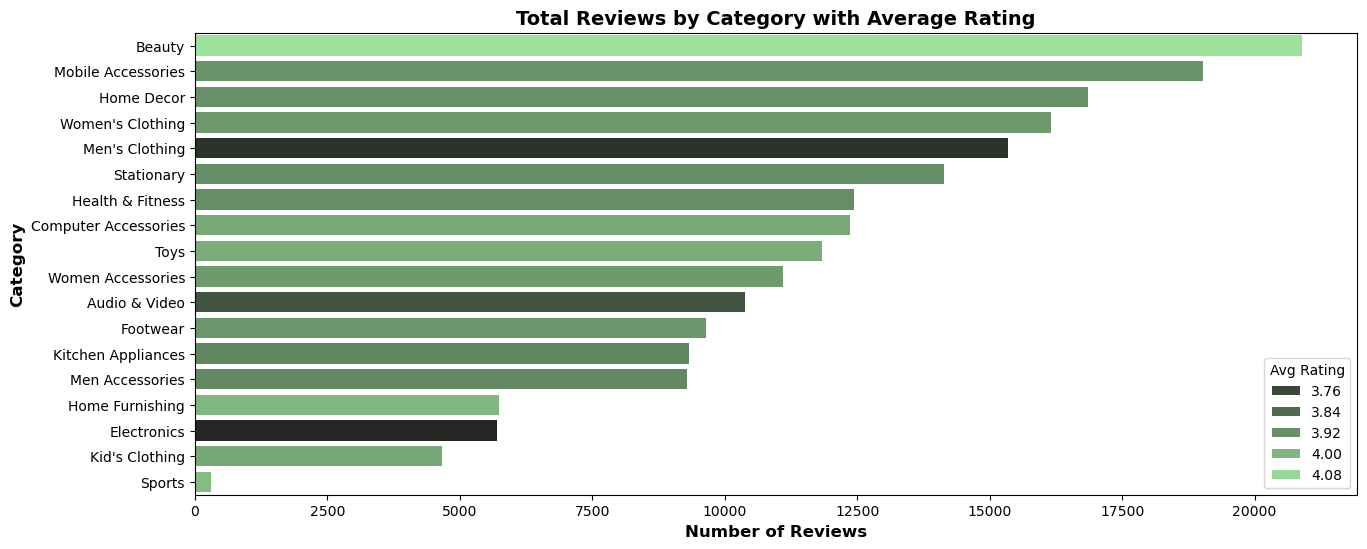

In [20]:
# Prepare data
plot_data = df_shopsy.groupby('Category').agg({
    'No_of_Reviews': 'sum',
    'Rating': 'mean'
}).sort_values('No_of_Reviews', ascending = False)

plt.figure(figsize=(15,6))

sns.barplot(
    x='No_of_Reviews',
    y=plot_data.index,
    data=plot_data,
    color = 'lightgreen',           
    hue=plot_data['Rating'],     
    dodge=False
)

plt.title("Total Reviews by Category with Average Rating", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews",fontsize=12, fontweight='bold')
plt.ylabel("Category",fontsize=12, fontweight='bold')
plt.legend(title="Avg Rating")
plt.show()

Insights

•Categories like toys, beauty, mobile accessories, and women accessories have the highest review counts.
•High review count indicates high customer engagement and popularity.
•Average ratings across categories are mostly between 3.7 and 4.1, showing generally positive feedback.

# Average Price by Category with Total Reviews

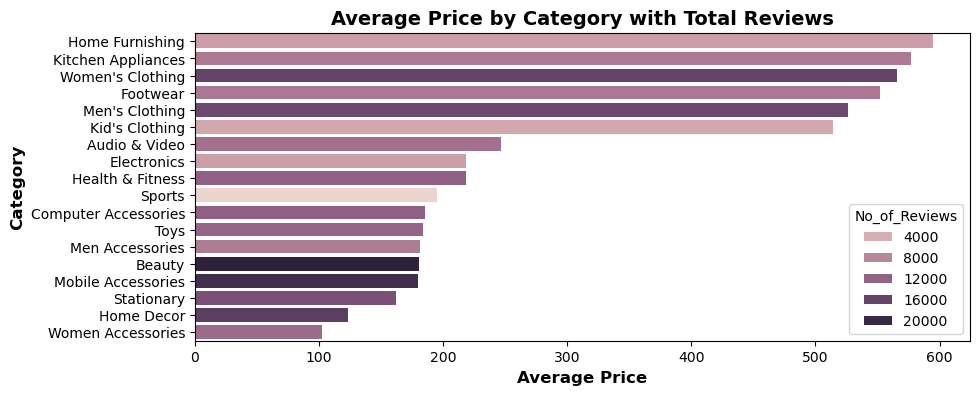

In [21]:
category_data = df_shopsy.groupby('Category').agg({'Price':'mean','No_of_Reviews':'sum'}).sort_values('Price', ascending = False)

plt.figure(figsize=(10,4))
sns.barplot(
    x='Price',
    y=category_data.index,
    data=category_data,
    hue=category_data['No_of_Reviews'], 
    dodge=False
)
plt.title("Average Price by Category with Total Reviews", fontsize=14, fontweight='bold')
plt.xlabel("Average Price", fontsize=12, fontweight='bold')
plt.ylabel("Category", fontsize=12, fontweight='bold')
plt.show()

Insights

•These categories have higher average prices and dark color intensity, indicating high total reviews.
•Customers are willing to spend more and actively review these products.

# Correlation Heatmap Analysis

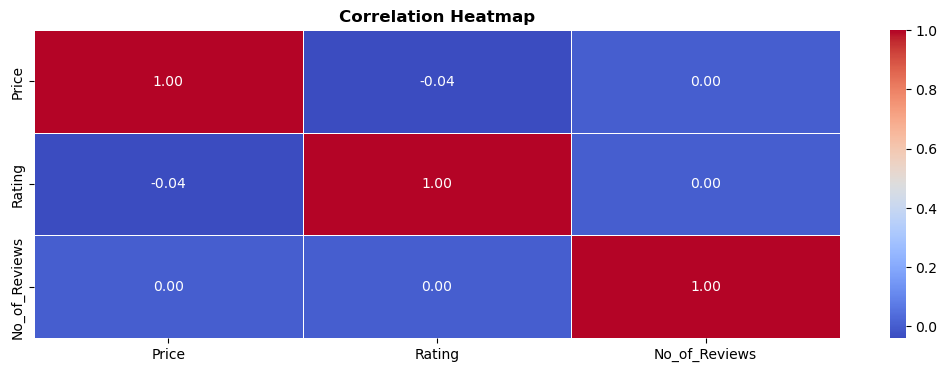

In [23]:

plt.figure(figsize=(13,4))
corr = df_shopsy.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

Insights:

•Most features show weak or negative correlation.
•No strong linear relationships.
•Indicates complex, non-linear behavior.

## DATA STORAGE

In [24]:
df_shopsy.to_csv("df_cleaned_shopsy.csv", index=False)

df_cleaned_shopsy = pd.read_csv("df_cleaned_shopsy.csv")
df_cleaned_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,692
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,524,3.8,57
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,465,3.9,27
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,629,4.0,157
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,550,3.9,381


In [25]:
pip install sqlalchemy pymysql

In [26]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///shopsy_products.db')
df_cleaned_shopsy.to_sql('shopsy_products', engine, if_exists='replace', index=False)

1001

In [27]:
df_check = pd.read_sql("SELECT * FROM shopsy_products LIMIT 5;", con=engine)
print(df_check)

                                        Product Name          Category  Price  \
0  BLACK PATTI Self Design Anarkali Kurta, Bottom...  Women's Clothing    587   
1    Nisha Fashion Kurta, Trouser/Pant & Dupatta Set  Women's Clothing    524   
2  TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...  Women's Clothing    465   
3  Parevadi Fashion Modern Graceful Women Kurta S...  Women's Clothing    629   
4  Reizen Embellished, Dyed, Geometric Print, Gra...  Women's Clothing    550   

   Rating  No_of_Reviews  
0     3.8            692  
1     3.8             57  
2     3.9             27  
3     4.0            157  
4     3.9            381  


In [28]:
query = "SELECT * FROM shopsy_products"
df = pd.read_sql(query,engine)

df.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,692
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,524,3.8,57
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,465,3.9,27
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,629,4.0,157
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,550,3.9,381


In [29]:
df['Category'].unique()

array(["Women's Clothing", "Men's Clothing", "Kid's Clothing", 'Footwear',
       'Home Decor', 'Beauty', 'Women Accessories', 'Men Accessories',
       'Home Furnishing', 'Kitchen Appliances', 'Sports', 'Stationary',
       'Electronics', 'Toys', 'Mobile Accessories', 'Health & Fitness',
       'Audio & Video', 'Computer Accessories'], dtype=object)

# UNSUPERVISED LEARNING

## K-Means Clustering

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
# Feature Selection
X = df[['Price', 'Rating', 'No_of_Reviews']]

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

  File "C:\Users\mathe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\mathe\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathe\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathe\anaconda3\Lib\subprocess.

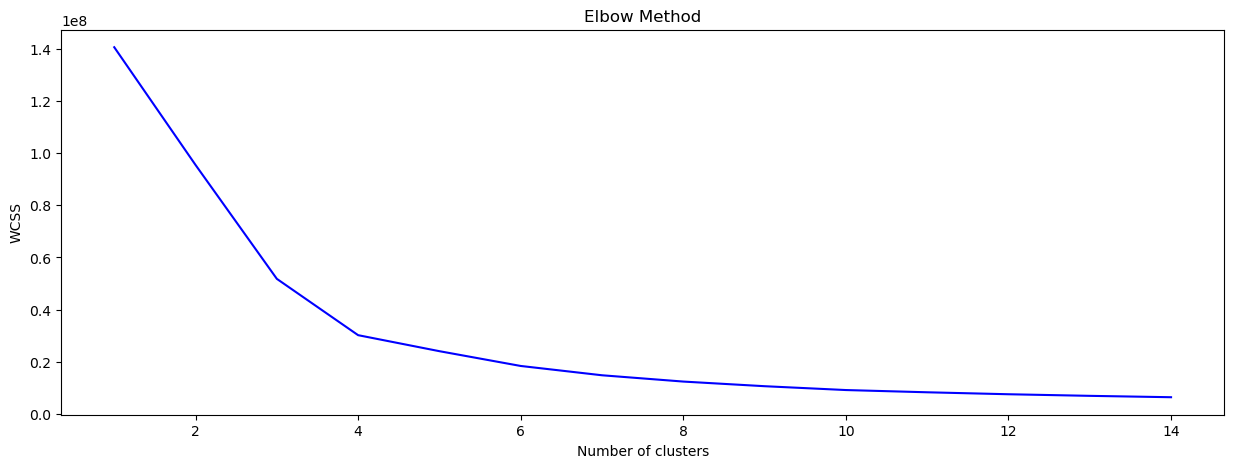

In [32]:
# Elbow method

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 15), wcss,color='Blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
#Implement with k = 3 Clusters

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)

pred_y = kmeans.fit_predict(X_scaled)
pred_y

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [34]:
df['Cluster'] = pred_y
df['Cluster'] = df['Cluster'] + 1 

In [35]:
df.head()

,Product Name,Category,Price,Rating,No_of_Reviews,Cluster
0,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,692,1
1,"Nisha Fashion Kurta, Trouser/Pant & Dupatta Set",Women's Clothing,524,3.8,57,2
2,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,465,3.9,27,2
3,Parevadi Fashion Modern Graceful Women Kurta S...,Women's Clothing,629,4.0,157,2
4,"Reizen Embellished, Dyed, Geometric Print, Gra...",Women's Clothing,550,3.9,381,1


In [36]:
df.groupby('Cluster')[['Price', 'Rating', 'No_of_Reviews']].mean()

,Price,Rating,No_of_Reviews
Cluster,,,
1,283.765258,3.940845,606.469484
2,280.244275,3.922137,96.054707
3,5037.500000,3.900000,279.000000


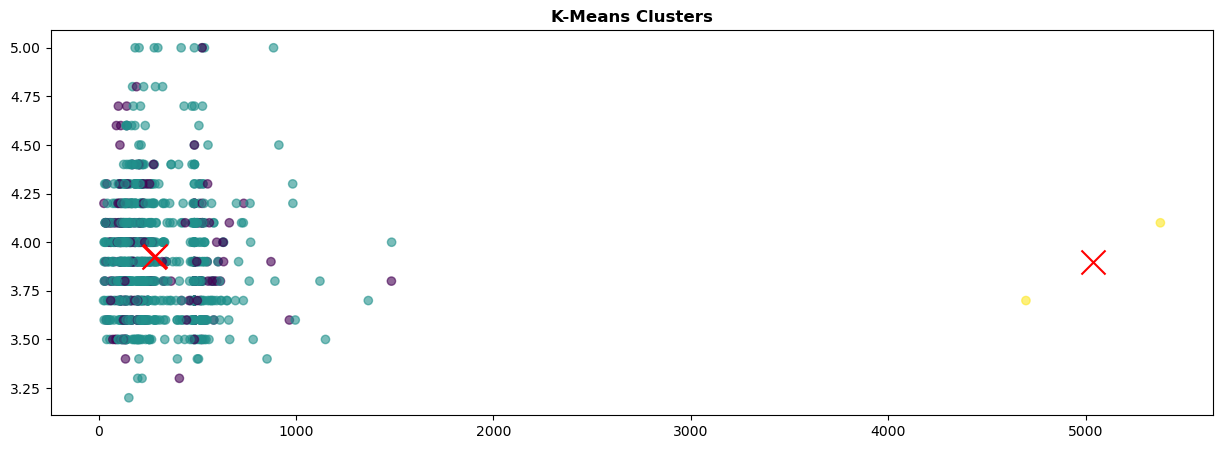

In [37]:
labels = kmeans.fit_predict(X)

plt.figure(figsize=(15,5))
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker = 'x'
)

plt.title("K-Means Clusters",fontweight = 'bold')
plt.show()

In [38]:
# Save to MySQL
df.to_sql(
    name='croma_products_clustered',
    con=engine,
    if_exists='replace',
    index=False
)

1001

## SUPERVISED LEARNING

In [39]:
pip install xgboost

In [40]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [41]:
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

In [42]:
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),

        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)


In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y)),
        eval_metric='mlogloss',
        random_state=42
    )
}


In [46]:
results = []

for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.935323   0.942524  0.935323  0.934635
1                  SVM  0.840796   0.860206  0.840796  0.841217
2        Decision Tree  0.810945   0.822523  0.810945  0.809773
3        Random Forest  0.910448   0.919778  0.910448  0.910270
4              XGBoost  0.875622   0.882501  0.875622  0.875502


#### Insights:

Random Forest gives 92% ,Logistic Regression gives 92% and XGBoost gives 86% were selected for hyperparameter tuning due to their superior performance and potential for further accuracy improvement.

## HYPERPARAMETER TUNING

In [47]:
# Features & Target
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split (ONLY ONCE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),
        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)


### RANDOM FOREST

In [48]:

rf_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])


rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRANDOM FOREST (BALANCED + TUNED)")
print("Best Params:", rf_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))



RANDOM FOREST (BALANCED + TUNED)
Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Accuracy : 0.900497512437811
Precision: 0.9095761228333661
Recall   : 0.900497512437811
F1 Score : 0.9002336396632769


## LOGISTIC REGRESSION

In [49]:

lr_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("\nLOGISTIC REGRESSION (BALANCED + TUNED)")
print("Best Params:", lr_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))



LOGISTIC REGRESSION (BALANCED + TUNED)
Best Params: {'model__C': 10}
Accuracy : 0.945273631840796
Precision: 0.9527007818052595
Recall   : 0.945273631840796
F1 Score : 0.9446987722506679


### XGBOOSTING

In [50]:
import numpy as np
xgb_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=len(np.unique(y)),
        tree_method='hist',   
        random_state=42,
        n_jobs=-1
    ))
])


xgb_param_dist = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_dist,
    n_iter=10,               
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)


xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_

y_pred_xgb = xgb_best.predict(X_test)

print("\nXGBOOST FINAL RESULTS")
print("Best Params:", xgb_random.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_xgb, average='weighted'))


XGBOOST FINAL RESULTS
Best Params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}
Accuracy : 0.8706467661691543
Precision: 0.8838821764194899
Recall   : 0.8706467661691543
F1 Score : 0.8726616517667234
